<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%BD%94%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###데이터 불러오기
import pandas as pd
housing=pd.read_csv('./cal_housing.csv',encoding='utf-8-sig')
zz=housing.columns

zz=pd.DataFrame(zz)
zz=zz.T

col=['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome','medianHouseValue']

zz.columns=col
housing.columns=col

housing=pd.concat([zz,housing],axis=0)
housing=housing.reset_index()
housing=housing.drop(['index'],axis=1)
housing=housing.astype(float) # csv파일을 따와서 가공한게 아니라서 이런식의 변환이 필수 불가결 이다.
housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [2]:
###데이터 전처리, EDA 하기, 시각화 및 상관관계 파악


housing.info() #데이터 누락값 있는지 등 여러가지 기초 정보를 제공한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
housing=housing.astype(float) #데이터 타입 변경, 시각화 스케일링 등등 할때 데이터 타입을 일치시키는 것은 중요하다.

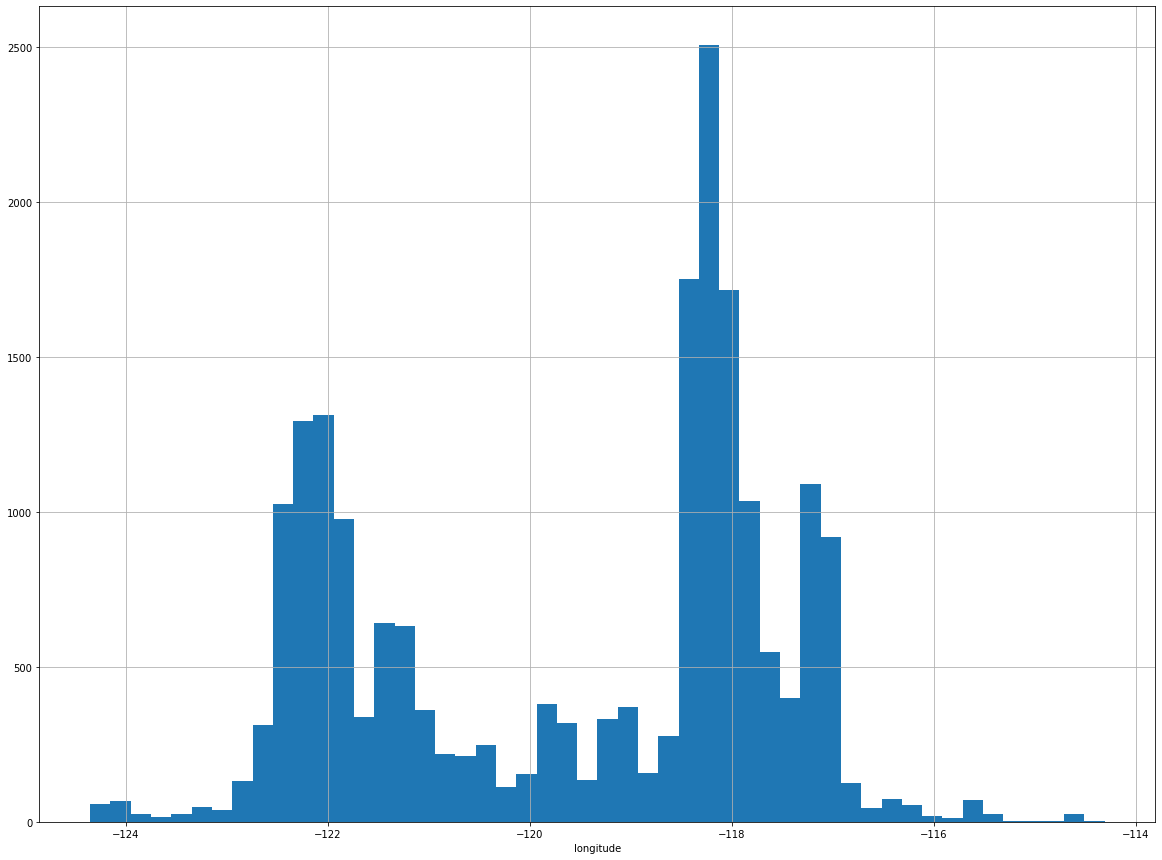

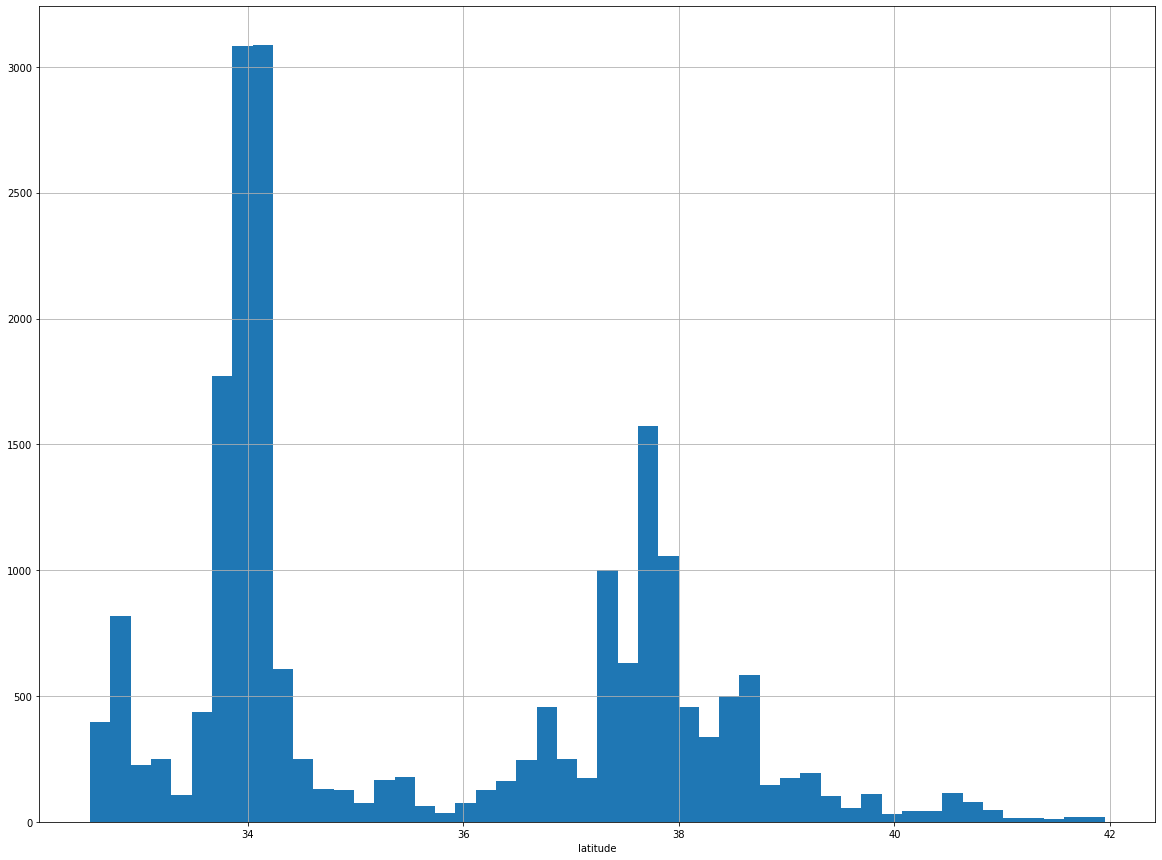

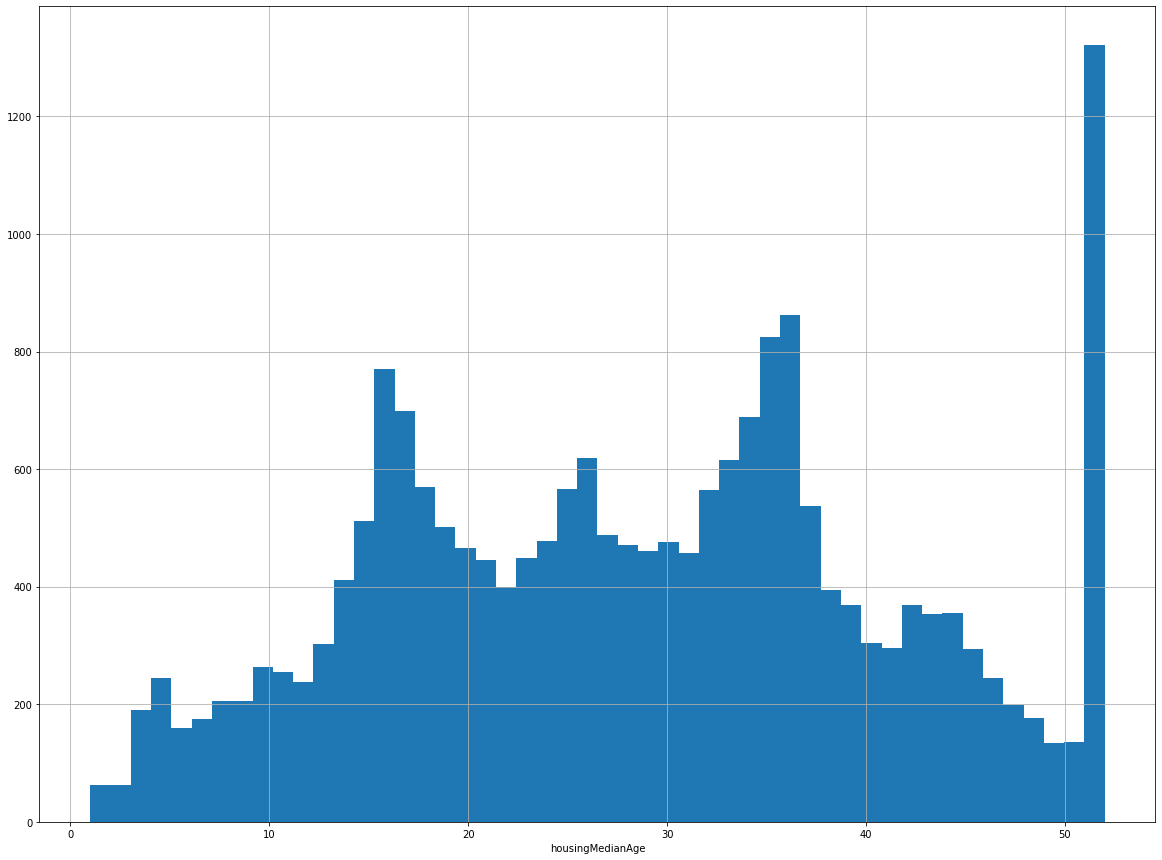

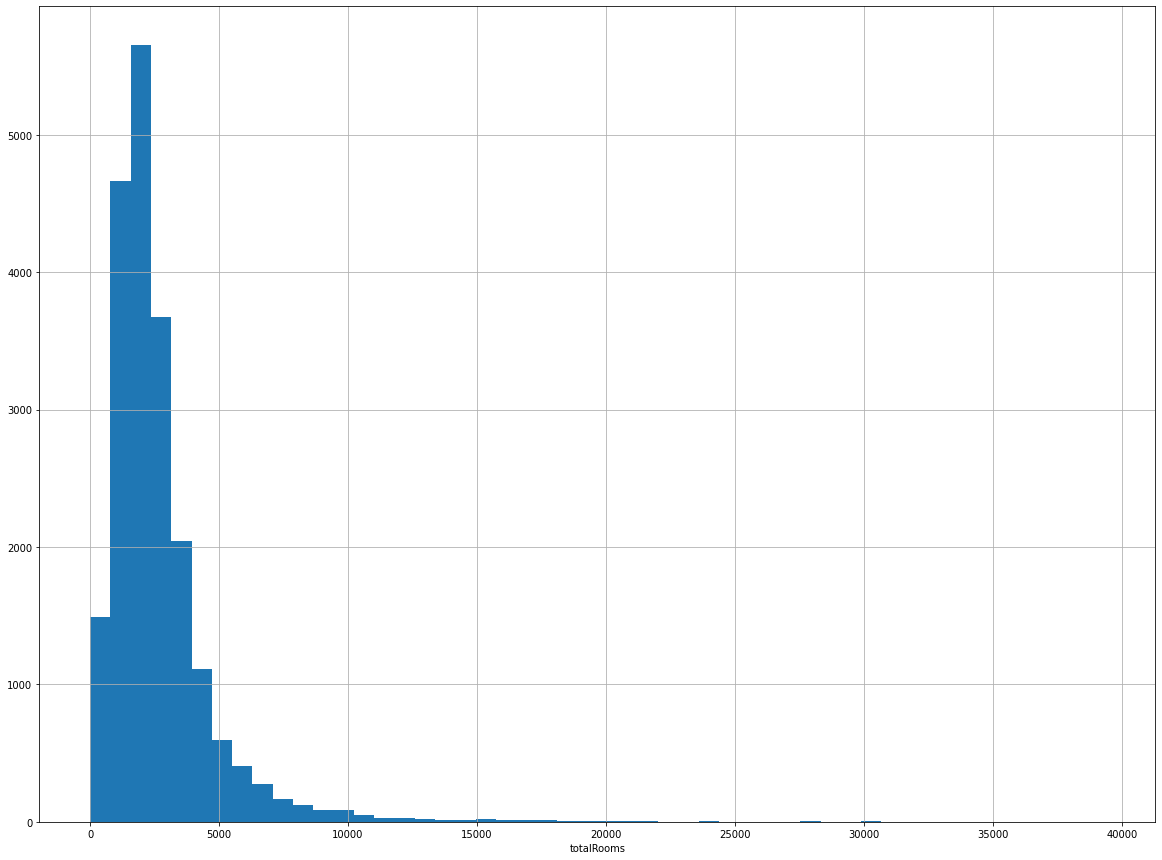

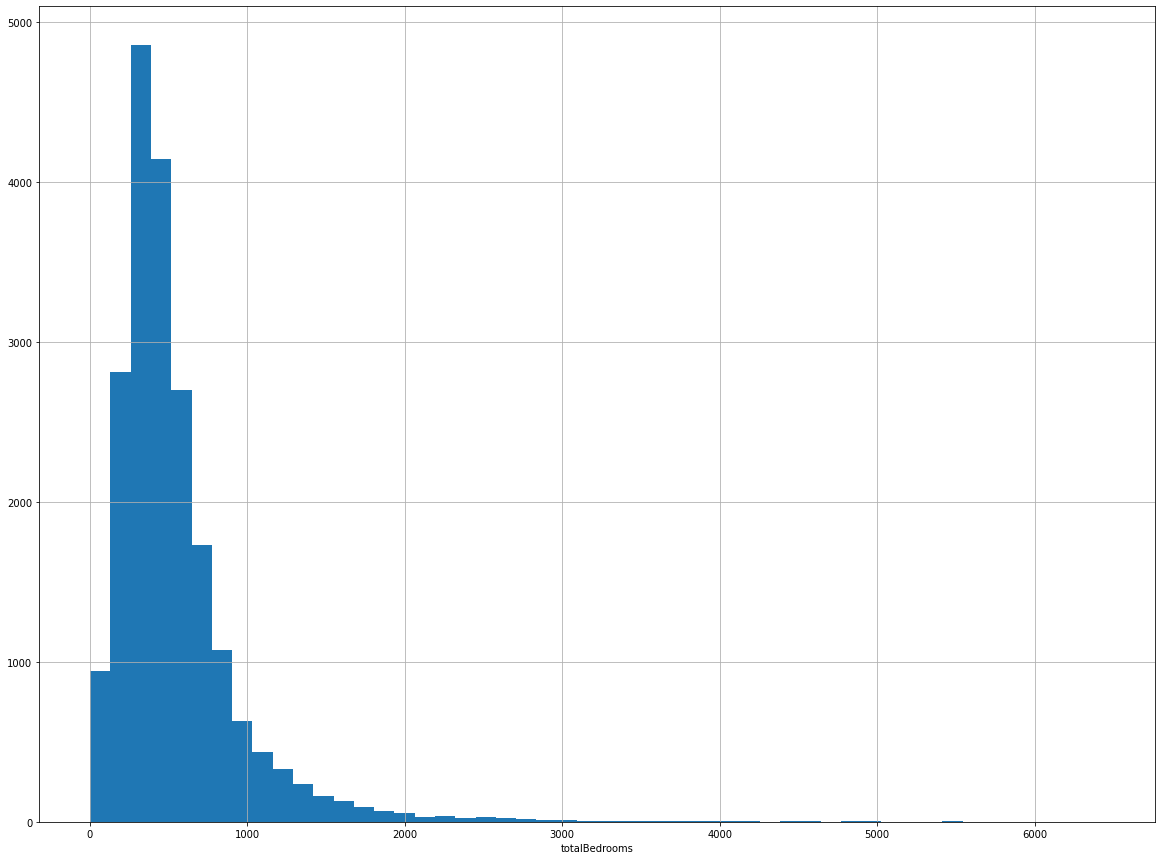

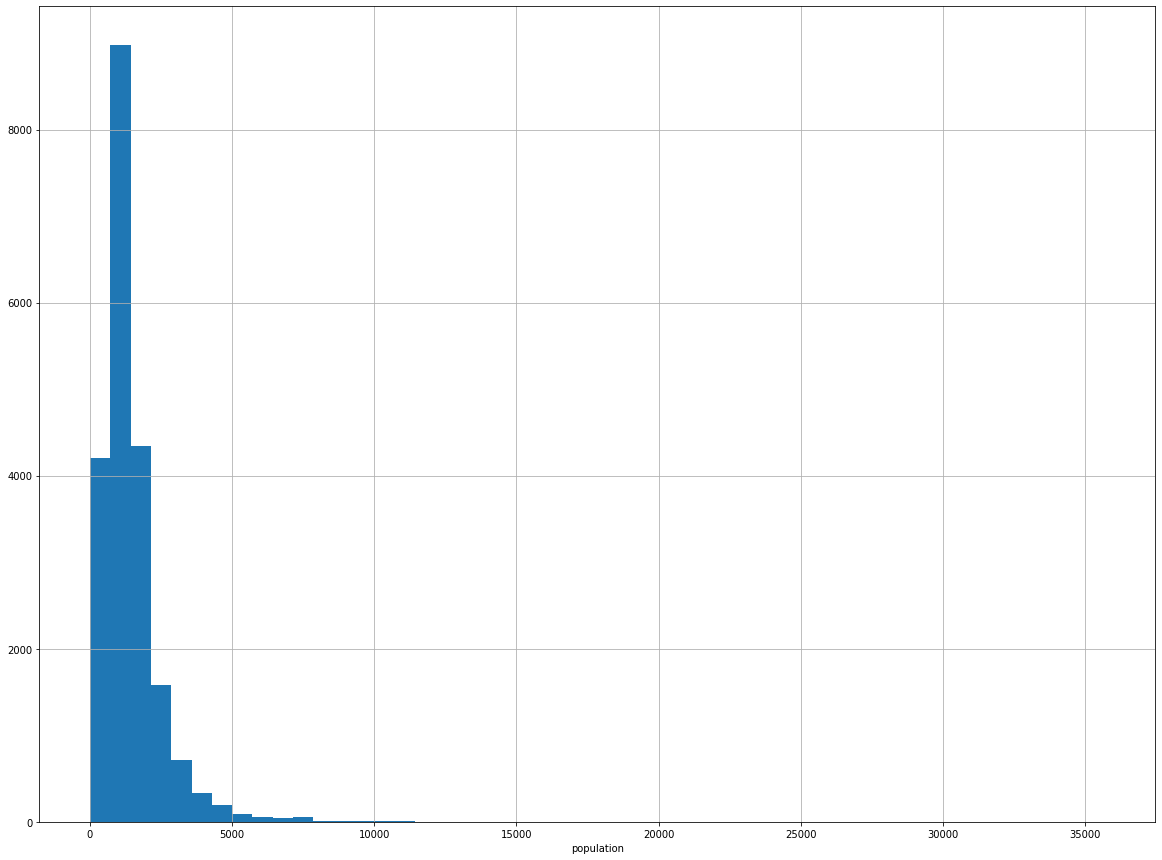

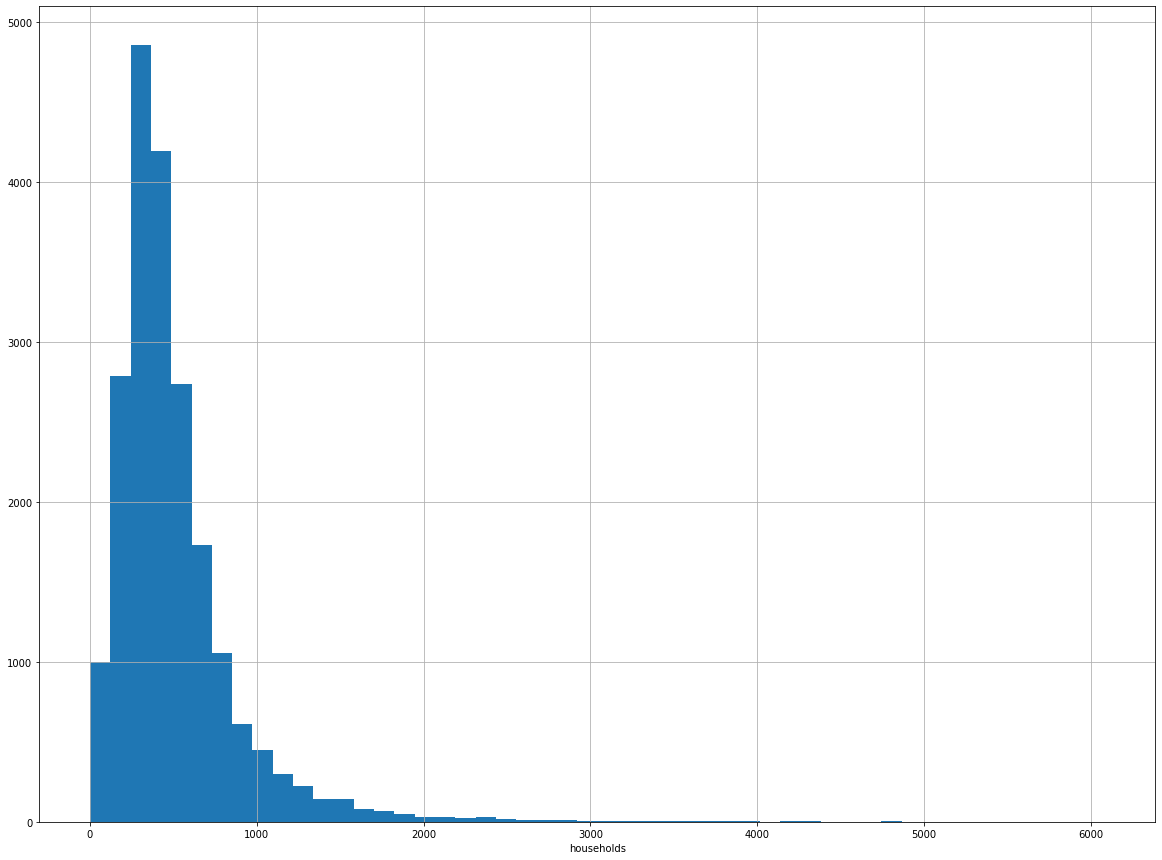

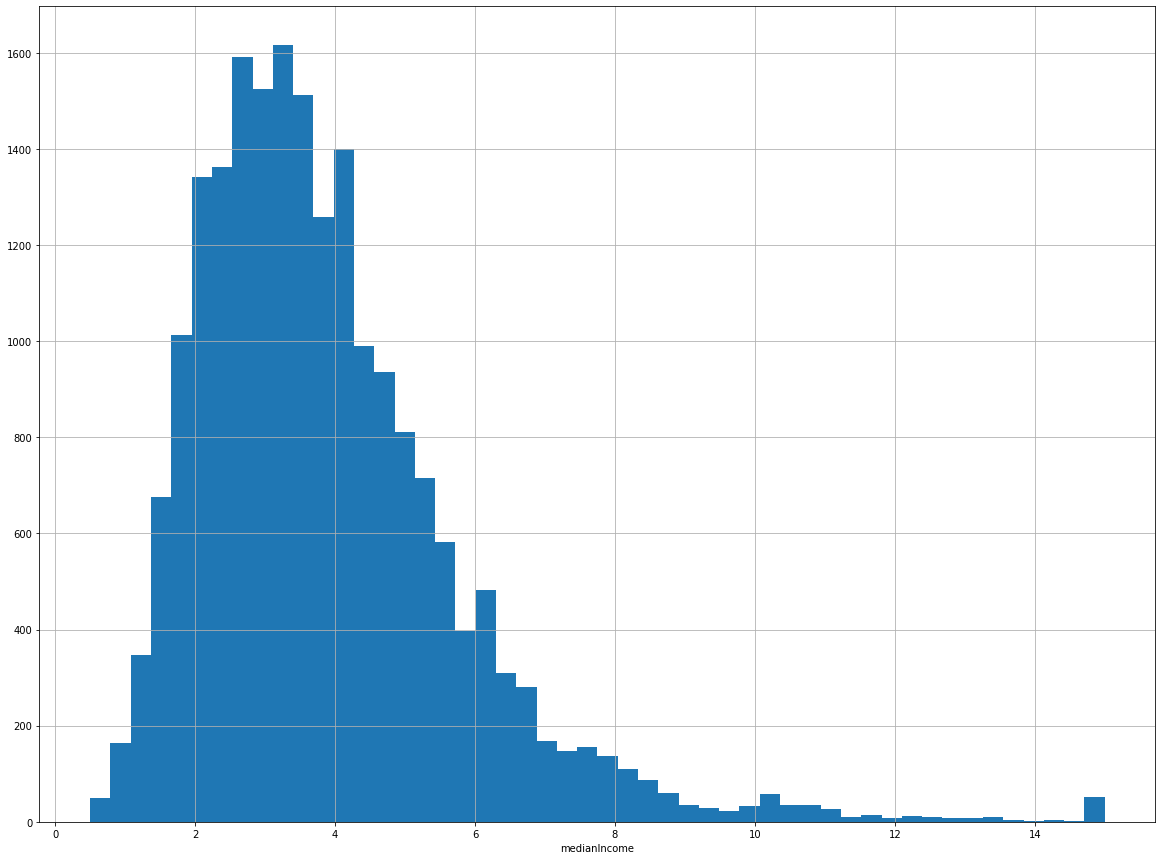

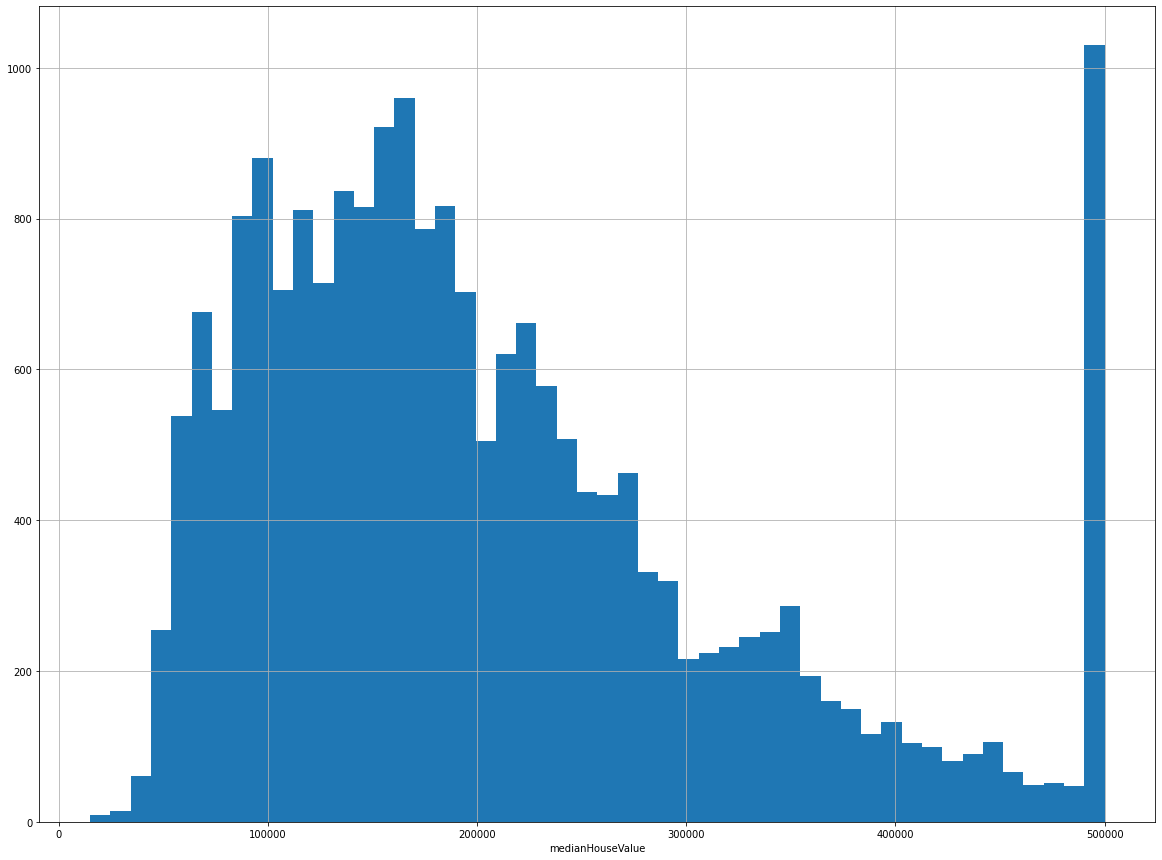

In [4]:
#데이터의 형태를 검토해보기 위해 숫자형 특성을 히스토그램으로 그려본다.
import seaborn as sns
import matplotlib.pyplot as plt
for colcol in housing:
  plt.xlabel(colcol)
  housing[colcol].hist(bins=50,figsize=(20,15))
  plt.show()

  #히스토그램 오른쪽 끝이 심하게 솟구치면서 끝난다는것은
  #최대값 혹은 최소값이 한정되어 있다는 상황으로 짐작이 가능하다.
    #그런데, 이것이 문제가 될지 안될지는 충분한 고려가 필요하다.
    #예를들어서, 고객으로부터 상한선을 넘어가더라도 정확한 예측값이 필요하다 or 아니다. 등


#---------------------------------------------------------------------------------------------#

#한계값을 넘어가더라도 정확한 예측값이 필요하다면 다음과 같은 두 가지 방법이 있다.

#한계값 밖의 구역에 대한 정확한 레이블을 구한다.

#훈련 세트에서 이런 구역을 제거한다.($500,000가 넘는 값에 대한 예측은 평가 결과가 매우 나쁠 것 이므로 테스트 세트에서도 제거 한다.)

#특성의 스케일 필요

# 히스토 그램의 꼬리가 두꺼운 경우가 많다. 가운데에서 왼쪽보다 오른쪽으로 더 멀리 뻗어있다.
#이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만드므로, 후에 종 모양의 분포가 되도록 변형시켜야 한다.

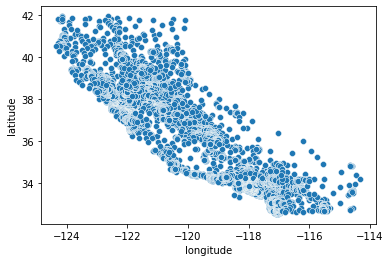

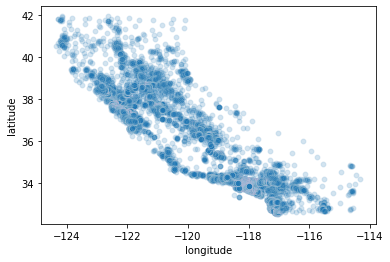

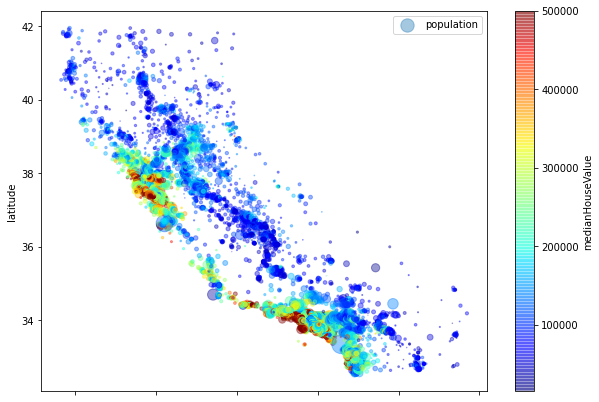

In [9]:
###시각화 하는 유용한 방법

#위도와 경도가 있으니 스캐터로 나타낸다

housing.plot(kind='scatter', x='longitude', y='latitude')

#seaborn 버젼
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=housing, x='longitude', y='latitude')

#여기서 알파를 0.1로 주면 밀집된 영역을 잘 보여준다.
# 베이 에어리어와 로스앤젤레스 근처, 샌디에고 부근 그리고 센트럴밸리 특히 새크라멘토와 프레즈노 근처를 따라 밀집된 지역이 긴 띠를 이룬다.
housing.plot(kind='scatter', x='longitude', y='latitude',alpha=0.1)

#seaborn 버젼
sns.scatterplot(data=housing, x='longitude', y='latitude',alpha=0.1)

#주택 가격 나타내기

#원의 반지름은 구역의 인구를 나타낸다.(s)
#색상은 가격을 나타낸다(c)

#미리 정의된 컬러 맵중 파란색(낮은가격) 에서 빨간색(높은가격) 까지 범위를 가지는 jet를 사용한다.(매개 변수 cmap)

housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4, s=housing['population']/100, label='population', figsize=(10,7), 
             c='medianHouseValue', 
             cmap=plt.get_cmap('jet'),
             colorbar=True)
plt.legend()

#위 그래프에서 보여지듯, 빨간색은 높은 가격, 파란색은 낮은 가격을 의미한다.


In [ ]:
###상관관계 파악하기

corr_matrix=housing.corr() #상관관계 조사

#중간 주택 가격과 다른 특성사이의 상관관계,

#즉 타겟 변수와 다른 특성과의 관계를 본다.

corr_matrix['medianHouseValue'].sort_values(ascending=False)

#잘보면 위도인 latitude와 주택 가격은 약한 음의 상관관계가 있는데

#그래프에서도 보이듯 북쪽으로 갈수록 주택 가격이 조금쌕 내려가는 경향이 없지 않아 있다.



In [ ]:
#상관관계를 그래프로 표현해 보기

sns.pairplot(data=housing)

In [ ]:
#특정 상관관계 보기

housing.plot(kind='scatter', x='medianIncome',y='medianHouseValue',alpha=0.1)
sns.scatterplot(data=housing,x='medianIncome', y='medianHouseValue',alpha=0.1)

#이 그래프에서 시사하는 바는 다음과 같다.

#첫째, 상관관계가 매우 강하다, 위쪽으로 향하는 경향과 포인트들이 집중적으로 모여있음을 알 수 있다.

#둘째, 앞서 본 가격 제한값이 $500,000에서 수평선으로 잘 보인다.

#하지만 수평선으로 보이는 것이 $450,000근처와 $350,000, $280,000등에도 있다.

#따라서 이러한 형태를 알고리즘이 학습하지 않도록 해당 구역을 제거하는 것이 좋다.

#어떤 특성은 꼬리가 두꺼운 분포라면 데이터를 변형해야 한다.(로그스케일 등)

#머신러닝 알고리즘을 적용하기 위해 마지막으로 해볼 것은 여러 특성의 조합을 시도해보는 것 이다.

In [6]:
###누락값채우기

#결측값의 경우 처리할때 몇 가지 방법이 있다.

# 평균으로 채우던가, 보간법으로 채우던가, 아예 삭제하던가, 그 예측변수마저도 회귀분석으로 예측을 시도 하던가

# .median() 메서드는 중간값을 반환 한다.

#사이킷런의 SimpleImputer 를 이용하여 누락된 값 채우기

from sklearn.impute import SimpleImputer #누락된 값을 채우는 모델

imputer=SimpleImputer(strategy = 'median')  #중간값으로 설정

imputer.fit(housing) #모델 훈련

imputer.statistics_ #훈련값 반환

#만약 데이터셋에 범주형 데이터가 있다면, 중간값은 수치형 자료에만 적용될 수 있기 때문에 따로 데이터셋을 만들어 분리 시킨후 적용한다.

#imputer는 각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_ 속성에 저장한다.

#물론 지금 하는 과정에 누락된 값이 없지만, 앞으로 업데이트 될 데이터에 누락값이 있을 수 있으니, 모든 수치형 특성에
#imputer를 적용 하는 것이 바람직 하다.


housing.median().values
#사이킷런의 impute 함수를 이용한 방법과 동일하다.
#사이킷런 안쓸꺼면 이걸로 .fillna(중간값) 하면된다.

housing_non_null=imputer.transform(housing) #fit으로 학습시킨후 적용하기
#이렇게 하면 결과값이 array로 나와서 데이터 프레임 형식으로 꼭 바꾸어 주어야 한다.
#그리고 중간값 등은 수치형자료에만 되는 거기 때문에, 범주형 자료가 있다면 분리해서 실시한다.


array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [8]:
###범주형 자료 다루는법
#이 카테고리를 텍스트에서 숫자로 변환 하는 법
#사이킷 런의 OrdinalEncoder을 사용한다.

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder() #모델 설정

prac_encode=ordinal_encoder.fit_transform(prac) #모델훈련 및 적용
prac_encode #이처럼 범주를 숫자로 바꿔준다.
            #결과 값은 array로 나온다.
ordinal_encoder.categories_
#적용시킨 OrdinalEncoder()에 카테고리 메서드를 적용해야 한다.
#바뀌기전 범주가 뭐였는지 확인 시켜 준다.

#----------------------------------------------------------------------------------------------------------------------

#이 표현 방식의 문제는 머신러닝 알고리즘이 가까이 있는 두 값이 떨어져 있는 두 값보다 더 비슷하다고 생각한다는 점이다.

#예를들어서 bad, average, good 등과같이 순서가 있는 카테고리의 경우는 괜찮을 수 있다.

#하지만 이러한 경우가 아니라면 일반적으로 카테고리별 이진 특성을 만들어 해결해야한다.

#예를들어 피자가 1이라면 그외 특성은 0으로 만들어주는, 그러한 원-핫 인코딩이 필요하다.

# 1 값을 가지는 것을 핫이라 표현하고 이를 원-핫 인코딩이라 한다.

#이따금 새로운 특성을 더미 특성이라고도 부른다.

#그리고 사이킷런은 범주의 값을 원-핫 벡터로 바꾸기 위한 OneHotEncoder 클래스를 제공한다.

from sklearn.preprocessing import OneHotEncoder
food_encoder=OneHotEncoder() #모델 설정
food_1hot=food_encoder.fit_transform(prac) #훈련 및 적용
food_1hot #이건 행렬로 나타나 지질 않는다.

#이떄 출력을 살펴보면 넘파이 배열이 아닌 사이파이 희소행렬이다.

#이는 수천 개의 카테고리가 있는 범주형 특성일 경우 매우 효율적이다.

#이런 원-핫 인코딩을 하면 열이 수천 개인 행렬로 변하고 각 행은 1이 하나 뿐이고 그 외에는 모두 0으로 채워져 있다.

#0을 모두 메모리에 저장하는 것은 낭비이므로 희소 행렬은 0이 아닌 원소의 위치만 저장한다.

#이 행렬을 거의 일반적인 2차원 배열처럼 사용할 수 있으나, 넘파이 배열로 바꾸러면 toarry() 메서드를 호출 해야 한다.
food_1hot.toarray() #이러면 행렬로 나타난다.

#이 또한 categories_ 인스턴스 변수를 사용해 카테고리 리스트를 얻을 수 있다.
food_encoder.categories_

In [10]:
###파생변수 만들기

#각 변수끼리 살펴보아서 어떻게 파생변수를 만들 수 있을까 살펴본다.

housing['rooms_per_household'] = housing['totalRooms']/housing['households']
housing['bedrooms_per_room']=housing['totalBedrooms']/housing['totalRooms']
housing['population_per_household']=housing['population']/housing['households']

In [ ]:
###훈련용, 테스트용 데이터셋 분리하는 방법

#테스트 세트를 만들때 테스트세트를 절대 쳐다보면안된다.

#왜냐하면 우리 뇌는 과적합되기 매우 쉬운 패턴감지 시스템이기 때문에, 테스트 세트를 미리 살펴보면, 겉으로 드러난 어떤 패턴에 속아 특정 머신러닝 모델을 선택하게 될지도 모른다.
#이 테스트 세트로 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 시스템을 론칭했을 때 기대한 성능이 나오지 않을 것이다.
#이를 데이터 스누핑 편향 이라고 한다.

#테스트 데이터 분리 과정 ,Numpy이용

import numpy as np
def test_train(data,ratio):
  shuffled=np.random.permutation(len(data))#데이터 개수만큼 섞고
  test_set_size=int(len(data)) * ratio
  test_indices=shuffled[:int(test_set_size)]
  train_indices=shuffled[int(test_set_size):]
  return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set= test_train(housing, 0.2)
print(len(train_set))
print(len(test_set))

#사이킷 런을 이용한 분리

#사이킷런으로 서브셋 나누기
#train_test_split

#난수 초깃값을 설정할 수 있는 random_state 매개변수가 있다.
#행의 개수가 같은 여러 개의 데이터셋을 넘겨서 같은 인덱스를 기반으로 나눌 수 있다.
from sklearn.model_selection import train_test_split

train_set1,test_set1=train_test_split(housing, test_size=0.2, random_state=42)

#훈련용, 테스트용 셋을 나누고 나서 시각화 등을 통하여 전체 데이터와 비교했을때 비슷하게 나눠졌는지 확인 해본다.

In [ ]:
#어떤 타겟변수를 예측할때 전문가가 중간 소득이 중간 주택가격을 예측하는 것에 있어서 매우 중요하다 했을때
#이 경우 테스트 세트가 전체 데이터셋에 있는 여러 소득 카테고리를 잘 대표해야 한다.
#중간 소득이 연속적인 숫자형 특성이므로 소득에 대한 카테고리 특성을 만들어야 한다.
#중간 소득은 대부분 1.5 ~6사이에 있지만 일부는 6을 넘기도 한다.
#계층별로 데이터셋에 충분한 샘플 수가 있어야하고, 그렇지 않으면 계층의 중요도를 추정하는데 편향이 발생한다.
#즉, 너무 많은 계층으로 나누면 안되고, 각 계층은 충분히 커야한다.

#pd.cut()을 이용하여 소득 카테고리 만들기

housing['income_cut']=pd.cut(housing['medianIncome'], bins=[0,1.5,3.0,4.5,6,np.inf], labels=[1,2,3,4,5])
housing['income_cut'].hist()


In [ ]:
#중요한 특성을 기준으로 나눈다고 생각했을때, 테스트 샘플이 전체 데이터셋을 잘 반영해야 하므로
#아래와 같이 중요한 특성을 pd.cut()을 이용하여 정돈해준다음에 그 중요한 특성을 포함시켜서 훈련용, 테스트용 셋으로 나누어 준다.

#즉, 중요한 변수가 있는가에 대한 자문을 받고 그것이 전체 데이터셋을 잘 대표할 수 있도록 훈련용, 테스트용 셋을 나누는 것이 중요하다.

#이때 중요한 것은 훈련용이 아닌 테스트가 전체 데이터를 잘 반영해야 한다.

#정리하면 전문가가 중요하다고 했던 그 특성을 껴서 그 특성을 기준으로 테스트 세트를 구해야 한다. 그리고 비율을 확인해본다.

#근데 이 과정은 사실 아직 미심 쩍다.

from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing['income_cut']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]

In [11]:
###종속, 독립변수 분할하기

#훈련용 데이터, 테스트 데이터셋을 각각 종속 , 독립변수를 나누어 준다.

In [ ]:
###데이터 스케일링 시작

# 데이터에 적용할 가장 중요한 변환 중 하나가 특성 스케일링 이다.

# 만약 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않는다.

# 타깃값에 대한 스케일링은 일반적으로 불필요 하다.

# 모든 특성의 범위를 같게 만들어주는 방법으로 min-max 스케일링 과 표준화(standardization)가 널리 사용된다.

# min-max 스케일링이 가장 간단한데, 0~1범위에 들도록 값을 이동하고 스케일을 조정하면 된다.

# 데이터에서 최솟값을 뺀 후 최댓값과 최솟값의 차이로 나누면 가능하다.

# 사이킷런에서는 이에 해당하는 MinMaxScaler 변환기를 제공한다.

# 0~1사이를 원하지 않는다면 feature_range 매개변수로 범위를 변경할 수 있다.

# 표준화는 평균을 뺀후 표준편차로 나누어 분산이 1이 되도록 한다.

# min-max스케일링과는 다르게 표준화는 범위의 상한과 하한이 없어 어떤 알고리즘에서는 문제가 될 수 있다.

# 예를들어 신경망의 경우 종종 입력값의 범위를 0에서 1사이를 기대한다.

# 하지만 표준화는 이상치에 영향을 덜 받는다.

# 표준화의 경우 StandardScaler 변환기를 사용 한다.

# 모든 변환기에서 스케일링은 전체 데이터가 아닌, 훈련 데이터에 대해서만 fit()메서드를 적용해야한다.

# 그런 다음 훈련 세트와 테스트세트에 대해 transform() 메서드를 사용한다.

from sklearn.preprocessing import MinMaxScaler #정규화
scaler=MinMaxScaler() #정규화 모델 설정
scaler.fit(X) #정규화 학습 , 훈련 데이터에만 적용
x_scale=scaler.transform(X) #정규화 적용 #이후 트레이닝에도 적용

#만약에 train셋으로 학습시키고, train에 적용후 test에 적용했는데 test값이 이상하게 나온다? -> 0,1사이의 값이 아닌게 나오는 경우

#그것은 scaler가 train 데이터를 학습하였기 때문이다.

#그리고 그것은 test와 train간의 경향이 다른 이상치가 있음을 알려 준다.

과연 타겟변수도 정규화를 한거 안한거 차이가 클까

In [ ]:
###모델 설정

from sklearn.linear_model import LinearRegression
model=LinearRegression() #선형회귀 모델 설정
model.fit(x_scale,Y) #선형 회귀모델 학습, X=독리변수, y= 종속변수 이런식으로 파라미터 지정가능, 근데 대문자 소문자 구별해야함
model.predict()#예측하고자 하는 데이터

In [ ]:
###RMSE 구하기(오차검증)

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing['medianHouseValue'], housing_predictions) #타겟값, 예측값
lin_rmse=np.sqrt(lin_mse)
lin_mse

###한번에 싹 해버리는 코드 구현해보기